## Analyzing New York Red Bulls 2024 Performance in MLS Games

## Context
The New York Red Bulls, aka RBNY, are one of the teams in Major League Soccer (MLS). They are one of the ten charter clubs of MLS, having competed in the league since its founding in 1996.

 vs NYCFC game?

1. Performance of team across years: dot plot of goals/games across years. the question, are they improving overall as a team.
2. Gather info across the years to see what characteristics for attackers, defenders, midfielders allows for higher goal scoring. 3 Heat maps. 
3. on an individual basis, how can these characteristics help the players improve. do they have values that are outliers which they should focus on.
4. tableau dashboard.


In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Load all data

In [437]:
all_data = {}

for year in range(2010, 2025):
    file_path = f"RBNY_yearly_stats/main_stats/all_{year}_stats.xlsx"
    sheets = pd.ExcelFile(file_path).sheet_names  # Get all sheet names
    
    # Load sheets with different skiprows based on sheet name
    dataframes = {
        f"{sheet}_{year}": pd.read_excel(file_path, sheet_name=sheet, skiprows=1 if sheet.lower() == "score" else 2)
        for sheet in sheets
    }
    
    all_data.update(dataframes)  # Store in the main dictionary    

## Team performance across years


Question: Is the performance of RBNY team improving over the years?



Analysis: The points per game (PPG) have been calculated from 2010 to 2024 which is a measure to assess the teams performance. 

$$
\displaystyle
ppg = \frac{3 \cdot \sum win + \sum draw}{\sum game}
$$

Finding: No overall improvement has been noted. However, the two extreme points were 2018 with high result (2.10 ppg) and 2023 with bad result (1.24 ppg). Lets evaluate what factors might have contributed to such different results.

Calculating team performance across years

In [438]:
# Function to calculate PPG for a given DataFrame
def ppg_calculation(ppg_data, df, year):
    wins = (df["Result"] == "W").sum()
    draws = (df["Result"] == "D").sum()
    games = len(df)

    if games > 0:
        ppg_data[year] = (3 * wins + draws) / games
    else:
        ppg_data[year] = None  # If no games, set PPG as None

In [439]:
# Dictionary to store PPG values
ppg_data = {}

# Iterate over the years to calculate PPG
for year in range(2010, 2025):
    sheet_name = f"score_{year}"  # The sheet name with the year appended

    if sheet_name in all_data:  # Ensure the sheet exists
        df = all_data[sheet_name]

        if "Result" in df.columns:
            df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
            ppg_calculation(ppg_data, df, year)  # Pass the correct arguments
        else:
            ppg_data[year] = None  # If "Result" column is missing, set PPG as None



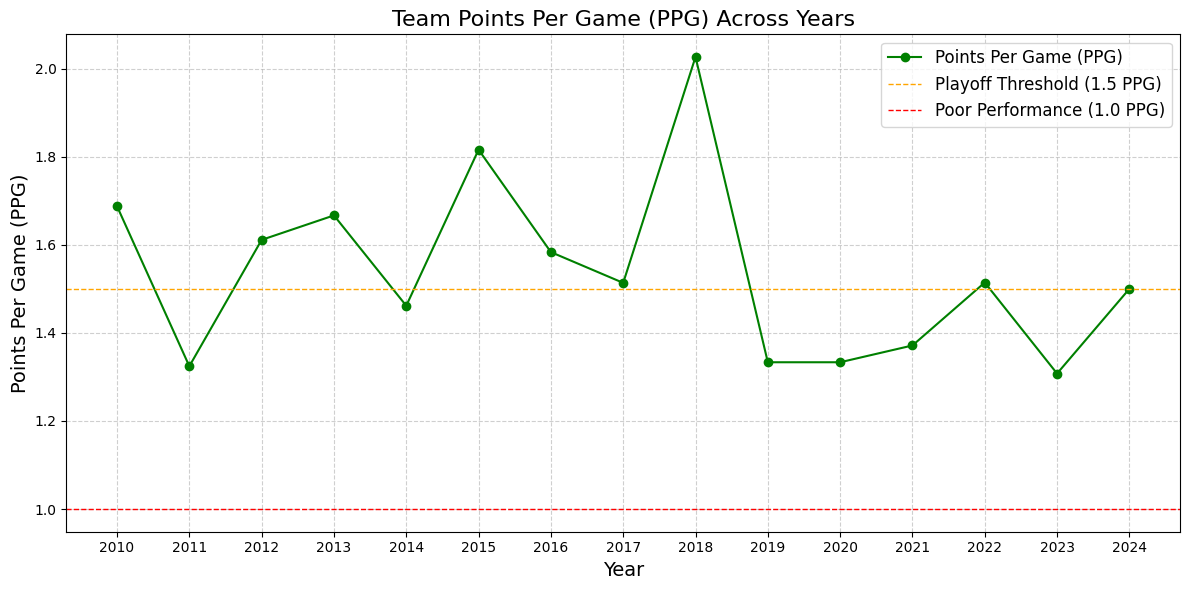

In [440]:
# Convert to DataFrame for plotting
ppg_df = pd.DataFrame(list(ppg_data.items()), columns=["Year", "PPG"])

# Plot PPG over the years
plt.figure(figsize=(12, 6))
plt.plot(ppg_df["Year"], ppg_df["PPG"], marker='o', linestyle='-', color='green', label="Points Per Game (PPG)")
plt.axhline(1.5, color='orange', linestyle='--', linewidth=1, label="Playoff Threshold (1.5 PPG)")
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label="Poor Performance (1.0 PPG)")
plt.title("Team Points Per Game (PPG) Across Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Points Per Game (PPG)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(ppg_df["Year"])
plt.tight_layout()
plt.show()


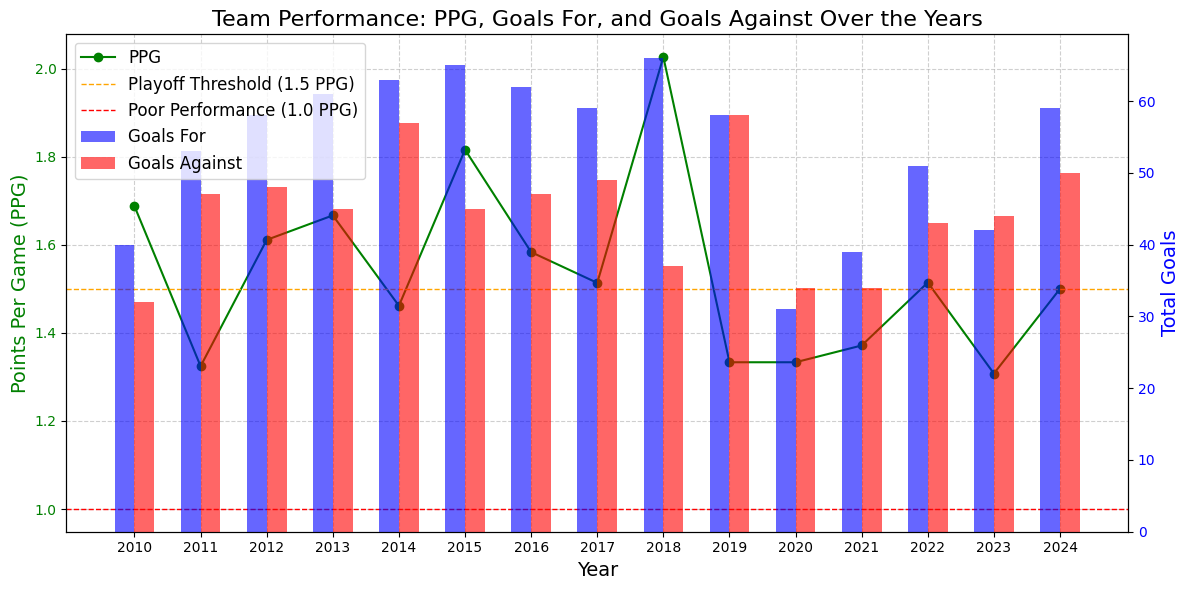

In [441]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store performance metrics
ppg_data = {}
goals_for_data = {}
goals_against_data = {}

# Iterate over the years to calculate PPG, GF, and GA
for year in range(2010, 2025):
    sheet_name = f"score_{year}"  # Sheet name with year appended

    if sheet_name in all_data:  # Ensure the sheet exists
        df = all_data[sheet_name]

        if "Result" in df.columns:
            df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
            ppg_calculation(ppg_data, df, year)  # Calculate PPG

        # Check if GF and GA exist
        if "GF" in df.columns and "GA" in df.columns:
            df["GF"] = pd.to_numeric(df["GF"], errors="coerce")  # Convert to numeric
            df["GA"] = pd.to_numeric(df["GA"], errors="coerce")
            goals_for_data[year] = df["GF"].sum()  # Total GF per year
            goals_against_data[year] = df["GA"].sum()  # Total GA per year
        else:
            goals_for_data[year] = None
            goals_against_data[year] = None

# Convert to DataFrame for plotting
df_plot = pd.DataFrame({
    "Year": list(ppg_data.keys()),
    "PPG": list(ppg_data.values()),
    "Goals For": list(goals_for_data.values()),
    "Goals Against": list(goals_against_data.values()),
})

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PPG as a line graph
ax1.plot(df_plot["Year"], df_plot["PPG"], marker='o', linestyle='-', color='green', label="PPG")
ax1.axhline(1.5, color='orange', linestyle='--', linewidth=1, label="Playoff Threshold (1.5 PPG)")
ax1.axhline(1.0, color='red', linestyle='--', linewidth=1, label="Poor Performance (1.0 PPG)")
ax1.set_ylabel("Points Per Game (PPG)", fontsize=14, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Secondary y-axis for Goals For & Goals Against
ax2 = ax1.twinx()
width = 0.3  # Bar width

# Plot GF and GA as bar graphs
ax2.bar(df_plot["Year"] - width/2, df_plot["Goals For"], width=width, color='blue', alpha=0.6, label="Goals For")
ax2.bar(df_plot["Year"] + width/2, df_plot["Goals Against"], width=width, color='red', alpha=0.6, label="Goals Against")

ax2.set_ylabel("Total Goals", fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Titles and grid
plt.title("Team Performance: PPG, Goals For, and Goals Against Over the Years", fontsize=16)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc="upper left")

plt.xticks(df_plot["Year"])
plt.tight_layout()
plt.show()



Columns in standard_stats_2010: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2011: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2012: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2013: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK'

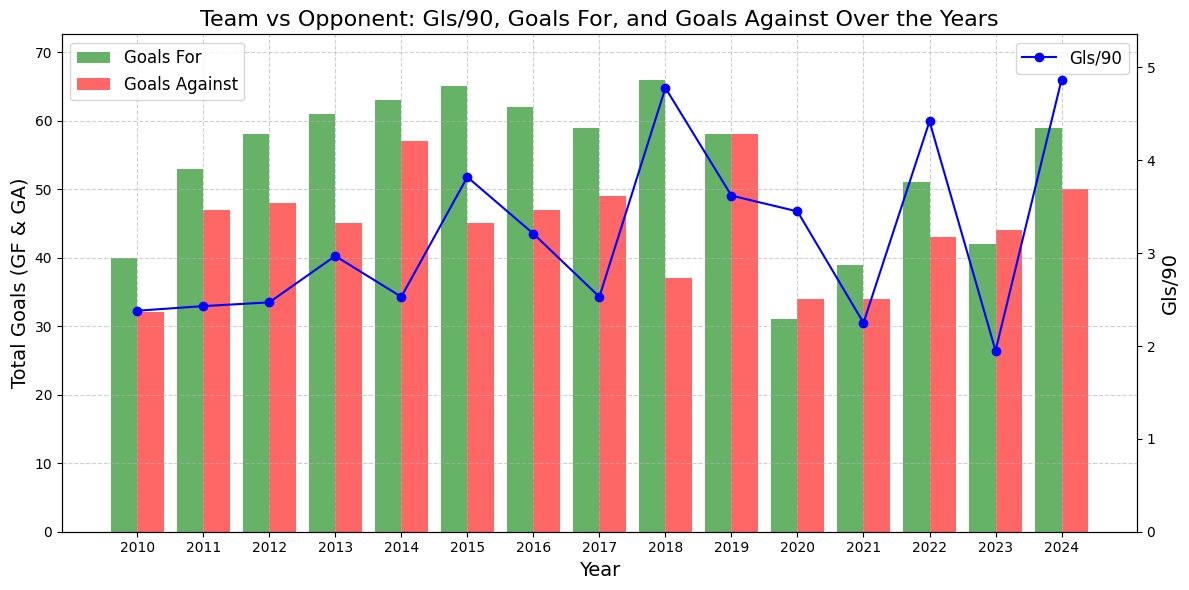

In [442]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated dictionaries for data
goals_for_data = {}  # GF for the team
goals_against_data = {}  # GA for the team
gls_1_data = {}  # Gls.1 for the team

# Iterate over the years to calculate the sum of G+A (goals plus assist), GF, and GA for the team
for year in range(2010, 2025):
    standard_stats_sheet = f"standard_stats_{year}"  # standard_stats_* sheet for G+A
    score_sheet = f"score_{year}"  # score_* sheet for GF and GA
    
    if standard_stats_sheet in all_data:  # Ensure the standard_stats_* sheet exists
        df = all_data[standard_stats_sheet]
        print(f"\nColumns in {standard_stats_sheet}:", df.columns)  # Debugging check
        
        # Extract Gls.1 (Fixed issue)
        if "Gls.1" in df.columns:  # **Corrected column check**
            df["Gls.1"] = pd.to_numeric(df["Gls.1"], errors="coerce")  # Convert to numeric
            gls_1_data[year] = df["Gls.1"].sum() if not df["Gls.1"].isnull().all() else 0  
        else:
            gls_1_data[year] = 0
    
    if score_sheet in all_data:  # Ensure the score_* sheet exists
        df = all_data[score_sheet]

        # Ensure the GF and GA columns exist in the score sheet
        if "GF" in df.columns and "GA" in df.columns:
            df["GF"] = pd.to_numeric(df["GF"], errors="coerce")  # Convert to numeric
            df["GA"] = pd.to_numeric(df["GA"], errors="coerce")
            goals_for_data[year] = df["GF"].sum()  # Sum GF for the year
            goals_against_data[year] = df["GA"].sum()  # Sum GA for the year
        else:
            goals_for_data[year] = None
            goals_against_data[year] = None


# Convert to DataFrame for plotting
df_plot = pd.DataFrame({
    "Year": list(goals_for_data.keys()),
    "Gls/90": list(gls_1_data.values()),
    "Goals For": list(goals_for_data.values()),
    "Goals Against": list(goals_against_data.values())
})

# Print to check if data is correctly prepared for plotting
print("\nData for plotting:")
print(df_plot)

# Check if any G+A, GF, or GA values are None or NaN
if df_plot["Gls/90"].isnull().all() or df_plot["Goals For"].isnull().all() or df_plot["Goals Against"].isnull().all():
    print("No valid data to plot!")

# Set the width for bar plots
width = 0.4

# Create figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Goals For and Goals Against as bar graphs on ax1
ax1.bar(df_plot["Year"] - width/2, df_plot["Goals For"], width=width, color='green', alpha=0.6, label="Goals For")
ax1.bar(df_plot["Year"] + width/2, df_plot["Goals Against"], width=width, color='red', alpha=0.6, label="Goals Against")

# Create secondary axis for Gls/90 line plot (independent y-axis)
ax2 = ax1.twinx()

# Plot Gls/90 as a line graph with dots on ax2
ax2.plot(df_plot["Year"], df_plot["Gls/90"], marker='o', linestyle='-', color='blue', label="Gls/90")

# **Handle NaN values before finding y-axis limits**
df_plot = df_plot.fillna(0)  # Replace NaN with 0 to prevent errors

# Find y-axis limits for Goals For & Goals Against (ax1)
y_min1 = df_plot[["Goals For", "Goals Against"]].min().min()
y_max1 = df_plot[["Goals For", "Goals Against"]].max().max()
y_max1 += y_max1 * 0.1  # Adding 10% buffer

# Find y-axis limits for Gls/90 (ax2) and apply a buffer (e.g., 10%)
y_min2 = df_plot["Gls/90"].min()
y_max2 = df_plot["Gls/90"].max()
y_max2 += y_max2 * 0.1  # Adding 10% buffer for Gls/90

# Set y_min to 0 for both axes
y_min = 0

# Apply the y-axis limits to both axes
ax1.set_ylim(y_min, y_max1)
ax2.set_ylim(y_min, y_max2)

# Set labels and title
ax1.set_ylabel("Total Goals (GF & GA)", fontsize=14)
ax2.set_ylabel("Gls/90", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

# Title and legends
plt.title("Team vs Opponent: Gls/90, Goals For, and Goals Against Over the Years", fontsize=16)
plt.xticks(df_plot["Year"])
ax1.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)

# Tight layout for better spacing
plt.tight_layout()
plt.show()



Use the same data but divided the amount of 90 minutes. certain years have played less games like 2020 and 2021 with covid.

# Understanding the Performance Gap from 2018 to 2024

Analysis: 
- Determine whether there is a significant difference in team metrics between 2018 and 2024. The analysis will categorize metrics based on player positions—attacker, midfielder, defender, and goalkeeper—since each role has specific performance indicators.
- Calculate the average and standard deviation for all metrics from both the 2018 and 2024 data sets. This data will be segmented by player roles to provide a visual representation, ensuring that any significant differences observed are meaningful and intuitive.

### Part 1: Preparing the data for statistical test

In [443]:
# Print all DataFrame names available from all_data
print("Loaded DataFrames:")
for df_name in all_data.keys():
    print(df_name)

Loaded DataFrames:
standard_stats_2010
score_2010
goalkeeping_2010
shooting_2010
playing_time_2010
miscellaneous_2010
standard_stats_2011
score_2011
goalkeeping_2011
shooting_2011
playing_time_2011
miscellaneous_2011
standard_stats_2012
score_2012
goalkeeping_2012
shooting_2012
playing_time_2012
miscellaneous_2012
standard_stats_2013
score_2013
goalkeeping_2013
shooting_2013
playing_time_2013
miscellaneous_2013
standard_stats_2014
score_2014
goalkeeping_2014
shooting_2014
playing_time_2014
miscellaneous_2014
standard_stats_2015
score_2015
goalkeeping_2015
shooting_2015
playing_time_2015
miscellaneous_2015
standard_stats_2016
score_2016
goalkeeping_2016
shooting_2016
playing_time_2016
miscellaneous_2016
standard_stats_2017
score_2017
goalkeeping_2017
shooting_2017
playing_time_2017
miscenallenous_2017
standard_stats_2018
score_2018
goalkeeping_2018
advanced_goalkeeping_2018
shooting_2018
passing_2018
pass_types_2018
shot_creation_2018
defensive_action_2018
possession_2018
playing_time_2

In [444]:
# display all columns
pd.set_option('display.max_columns', None)

Compile repeating columns that must be eliminated

In [445]:
# Set the years to be compared
compared_year = 2021
interesting_year = 2024

# Identify the general stats columns (from the first sheet)
general_stats_2018_cols = set(all_data.get(f"standard_stats_{compared_year}", pd.DataFrame()).columns)
general_stats_2024_cols = set(all_data.get(f"standard_stats_{interesting_year}", pd.DataFrame()).columns)

# Drop Pos because it must be kept in all sheets
general_stats_2018_cols = [col for col in general_stats_2018_cols if col not in {"Pos", "Player", "90s"}]
general_stats_2024_cols = [col for col in general_stats_2024_cols if col not in {"Pos", "Player", "90s"}]

print(general_stats_2018_cols)

['Min', 'npxG.1', 'PrgC', 'xG+xAG', 'npxG+xAG.1', 'Nation', 'Ast', 'G+A', 'CrdY', 'G+A-PK', 'G-PK', 'G+A.1', 'MP', 'xG', 'xAG.1', 'Gls', 'xG.1', 'Gls.1', 'Ast.1', 'G-PK.1', 'npxG+xAG', 'CrdR', 'PK', 'xAG', 'PrgR', 'Matches', 'Age', 'PKatt', 'npxG', 'Starts', 'PrgP']


Filter sheets of interest from all_data based on selected years and remove repeating columns 

In [446]:
# Create a new dictionary for non-repeating columns
filtered_data = {}

for df_name, df in all_data.items():
    # Only keep data from 2021 and 2024
    if str(compared_year) not in df_name and str(interesting_year) not in df_name:
        continue  # Skip any other years

    # Always keep the general stats sheets for these years WITHOUT filtering columns
    if "standard_stats" in df_name:  # Match any standard stats sheet
        filtered_data[df_name] = df  # Store the full DataFrame
        continue  # Skip column filtering

    # Identify non-repeating columns for all other sheets
    reference_cols = general_stats_2018_cols if str(compared_year) in df_name else general_stats_2024_cols
    non_repeating_cols = [col for col in df.columns if col not in reference_cols]

    # Store only the unique columns in the new DataFrame
    filtered_data[df_name] = df[non_repeating_cols]

# Print filtered DataFrame names
print(f"Filtered DataFrames ({compared_year} & {interesting_year}, without repeating columns except General Stats):")
for df_name, df in filtered_data.items():
    print(df_name, df.shape)


Filtered DataFrames (2021 & 2024, without repeating columns except General Stats):
standard_stats_2021 (31, 34)
score_2021 (35, 17)
goalkeeping_2021 (1, 17)
advanced_goalkeeping_2021 (1, 28)
shooting_2021 (28, 15)
passing_2021 (28, 23)
pass_types_2021 (28, 18)
shot_creation_2021 (28, 19)
defensive_action_2021 (28, 19)
possession_2021 (28, 23)
playing_time_2021 (31, 21)
miscellaneous_2021 (28, 17)
standard_stats_2024 (33, 34)
score_2024 (38, 17)
goalkeeping_2024 (2, 17)
advanced_goalkeeping_2024 (2, 28)
shooting_2024 (27, 15)
passing_2024 (27, 23)
pass_types_2024 (26, 18)
shot_creation_2024 (27, 19)
defensive_action_2024 (27, 19)
possession_2024 (27, 23)
playing_time_2024 (33, 21)
miscellaneous_2024 (27, 17)


Ensure Data Integrity

In [447]:
# Print column names and data for each remaining df 
for df_name, df in filtered_data.items():
    print(f"Data in {df_name}:")
    print(df.head())
    print("-" * 50)

Data in standard_stats_2021:
           Player  Nation    Pos  Age  MP  Starts     Min   90s  Gls  Ast  \
0  Carlos Coronel  py PAR     GK   24  34      34  3060.0  34.0  0.0  0.0   
1      Sean Davis  us USA     MF   27  34      34  3060.0  34.0  0.0  0.0   
2     Sean Nealis  us USA     DF   24  28      28  2430.0  27.0  1.0  0.0   
3     Kyle Duncan  us USA  DF,MF   23  32      27  2600.0  28.9  1.0  3.0   
4  Patryk Klimala  pl POL     FW   22  29      26  2079.0  23.1  8.0  6.0   

    G+A  G-PK   PK  PKatt  CrdY  CrdR    xG  npxG  xAG  npxG+xAG  PrgC   PrgP  \
0   0.0   0.0  0.0    0.0   1.0   0.0   0.0   0.0  0.0       0.0   0.0    0.0   
1   0.0   0.0  0.0    0.0   7.0   0.0   0.5   0.5  3.5       4.0  34.0  230.0   
2   1.0   1.0  0.0    0.0   4.0   0.0   2.2   2.2  0.7       2.9   7.0   84.0   
3   4.0   1.0  0.0    0.0  10.0   0.0   1.2   1.2  2.8       4.0  68.0  101.0   
4  14.0   5.0  3.0    4.0   6.0   0.0  14.3  11.2  3.2      14.4  33.0   21.0   

    PrgR  Gls.1  Ast.

Exclude players with less than 90 mins playtime

In [448]:
# Loop through all sheets and filter out players with "90s" < 1.0 aka outliers
for sheet_name, df in filtered_data.items():
    if "90s" in df.columns:
        filtered_df = df[df["90s"] >= 1.0].copy()  # Keep only players who played at least 90 minutes
        filtered_data[sheet_name] = filtered_df
        print(f"✅ Filtered {sheet_name}: {len(df) - len(filtered_df)} rows removed.")
    else:
        filtered_data[sheet_name] = df  # If "90s" column is missing, keep the original

✅ Filtered standard_stats_2021: 7 rows removed.
✅ Filtered goalkeeping_2021: 0 rows removed.
✅ Filtered advanced_goalkeeping_2021: 0 rows removed.
✅ Filtered shooting_2021: 4 rows removed.
✅ Filtered passing_2021: 4 rows removed.
✅ Filtered pass_types_2021: 4 rows removed.
✅ Filtered shot_creation_2021: 4 rows removed.
✅ Filtered defensive_action_2021: 4 rows removed.
✅ Filtered possession_2021: 4 rows removed.
✅ Filtered playing_time_2021: 7 rows removed.
✅ Filtered miscellaneous_2021: 4 rows removed.
✅ Filtered standard_stats_2024: 10 rows removed.
✅ Filtered goalkeeping_2024: 0 rows removed.
✅ Filtered advanced_goalkeeping_2024: 0 rows removed.
✅ Filtered shooting_2024: 4 rows removed.
✅ Filtered passing_2024: 4 rows removed.
✅ Filtered pass_types_2024: 3 rows removed.
✅ Filtered shot_creation_2024: 4 rows removed.
✅ Filtered defensive_action_2024: 4 rows removed.
✅ Filtered possession_2024: 4 rows removed.
✅ Filtered playing_time_2024: 10 rows removed.
✅ Filtered miscellaneous_2024

## Part 2: Determine which metrics are significantly different from 2018 and 2024 data

Analysis:
- Part 1: 
        H0: No significant difference exists between the 2018 and 2024 metrics
        H1: A significant difference exists between 2018 and 2024 metrics

- Part 2: 
        H0: No significant difference exists between the players roles (either attacker, defender, or midfielder) of 2018 and 2024 data
        H1: A singificant difference exists between the players roles of 2018 and 2024 data 
        - Goalkeeper: for the goalkeepers it would have been ideal to calculate for a signficant difference between 2018 and 2024 for the metrics in "goalkeeping", "advanced_goalkeeping" and "standard_stats" sheets. However, statistical tests are only meaningful with a MINIMUM of 3-5 samples, whereas we only have 2 players for each year (2 samples).


Helper functions performing statistical analysis

Statistical analysis between 2018 and 2024 data

In [449]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Excluded sheets due to having less than 3 instances
EXCLUDED_SHEETS = {"goalkeeping", "advanced_goalkeeping"}

# Function to filter and merge data
def filter_and_merge_data(filtered_data, year_extraction=True, exclude_score=False):
    all_data = []

    for df_name, df in filtered_data.items():
        sheet_base_name = "_".join(df_name.split("_")[:-1])

        # Step 1: Skip excluded sheets
        if sheet_base_name in EXCLUDED_SHEETS:
            print(f"⏩ Skipping sheet: {df_name}")
            continue

        # Step 2: Skip "score" sheets only if exclude_score is True
        if exclude_score and "score" in sheet_base_name:
            print(f"⏩ Skipping sheet: {df_name}")
            continue  

        year = compared_year if str(compared_year) in df_name else interesting_year if year_extraction else None
        df = df.copy()
        df.loc[:, "Year"] = year  

        all_data.append(df)

    return pd.concat(all_data, ignore_index=True) if all_data else None

# Function to check normality
def check_normality(data):
    if len(data) < 3: 
        return None
    if data.nunique() == 1: 
        return True  
    return shapiro(data)[1] >= 0.05  

# Function to check variance
def check_variance(data1, data2):
    return levene(data1, data2)[1] < 0.05  

# Function to select statistical test
def select_statistical_test(values_2018, values_2024):
    normality_2018 = check_normality(values_2018)
    normality_2024 = check_normality(values_2024)
    
    normality_violated = (normality_2018 is not None and not normality_2018) or \
                         (normality_2024 is not None and not normality_2024)

    variance_violated = check_variance(values_2018, values_2024)

    if not normality_violated and not variance_violated:
        return ttest_ind(values_2018, values_2024, equal_var=True, nan_policy="omit"), "T-Test (Equal Var)"
    elif not normality_violated and variance_violated:
        return ttest_ind(values_2018, values_2024, equal_var=False, nan_policy="omit"), "Welch’s T-Test"
    else:
        return mannwhitneyu(values_2018, values_2024, alternative="two-sided"), "Mann-Whitney U Test"

# Function to perform statistical analysis
def perform_statistical_analysis(df_2018, df_2024, filename):
    numeric_cols = [col for col in df_2018.select_dtypes(include=["number"]).columns if col != "Year"]

    results = []
    assumption_violations = {}

    for metric in numeric_cols:
        values_2018, values_2024 = df_2018[metric].dropna(), df_2024[metric].dropna()

        if len(values_2018) < 3 or len(values_2024) < 3:
            print(f"⚠️ Skipping {metric} (Not enough data)")
            continue  

        (statistic, p_val), test_name = select_statistical_test(values_2018, values_2024)

        normality_violated = not check_normality(values_2018) or not check_normality(values_2024)
        variance_violated = check_variance(values_2018, values_2024)

        if normality_violated or variance_violated:
            assumption_violations[metric] = {"normality": normality_violated, "variance": variance_violated}

        results.append({
            "Metric": metric, 
            "Avg_Diff": values_2018.mean() - values_2024.mean(), 
            "p-value": p_val, 
            "Test Used": test_name
        })

    if results:
        comparison_df = pd.DataFrame(results)
        comparison_df["Significant"] = comparison_df["p-value"] < 0.05  # Create the 'Significant' column only after results are available
        significant_diffs = comparison_df[comparison_df["Significant"]]

        # Save the significant differences to CSV
        significant_diffs.to_csv(filename, index=False)
        print(f"\n✅ {len(significant_diffs)} significant differences found. Results saved to {filename}.")

        if assumption_violations:
            print("\n⚠️ Assumption violations detected:")
            for metric, issues in assumption_violations.items():
                print(f" - {metric}: Normality violated? {issues['normality']}, Variance violated? {issues['variance']}")

        return significant_diffs
    else:
        print("⚠️ No significant results found.")
        return pd.DataFrame()  # Return an empty DataFrame in case of no results



In [450]:
# Main execution for yearly comparison
merged_df = filter_and_merge_data(filtered_data)
if merged_df is not None:
    perform_statistical_analysis(
        merged_df[merged_df["Year"] == compared_year], 
        merged_df[merged_df["Year"] == interesting_year], 
        "RBNY_yearly_stats/significance/yearly_significant_diff.csv"
    )

⏩ Skipping sheet: goalkeeping_2021
⏩ Skipping sheet: advanced_goalkeeping_2021
⏩ Skipping sheet: goalkeeping_2024
⏩ Skipping sheet: advanced_goalkeeping_2024

✅ 8 significant differences found. Results saved to RBNY_yearly_stats/significance/yearly_significant_diff.csv.

⚠️ Assumption violations detected:
 - MP: Normality violated? True, Variance violated? False
 - 90s: Normality violated? True, Variance violated? True
 - Gls: Normality violated? True, Variance violated? False
 - Ast: Normality violated? True, Variance violated? False
 - G+A: Normality violated? True, Variance violated? False
 - G-PK: Normality violated? True, Variance violated? False
 - PK: Normality violated? True, Variance violated? False
 - PKatt: Normality violated? True, Variance violated? False
 - CrdY: Normality violated? True, Variance violated? False
 - CrdR: Normality violated? True, Variance violated? False
 - xG: Normality violated? True, Variance violated? False
 - npxG: Normality violated? True, Variance

Retrieve significant metrics from unsegmented yearly analysis

In [451]:
# Load significant differences for all players combined 
df_significant_all = pd.read_csv("RBNY_yearly_stats/significance/yearly_significant_diff.csv")

# Get metric names found to have significant differences between years
significant_all_metric = df_significant_all['Metric'].dropna().tolist()
print(significant_all_metric)

['Poss', 'Attendance', 'Cmp%', 'Cmp%.2', 'Mn/Sub', 'onG', 'onGA', 'xG+/-90']


Assess proportion of different types of completed pass: short (Cmp%.1), medium (Cmp%.2), long (Cmp%.3)

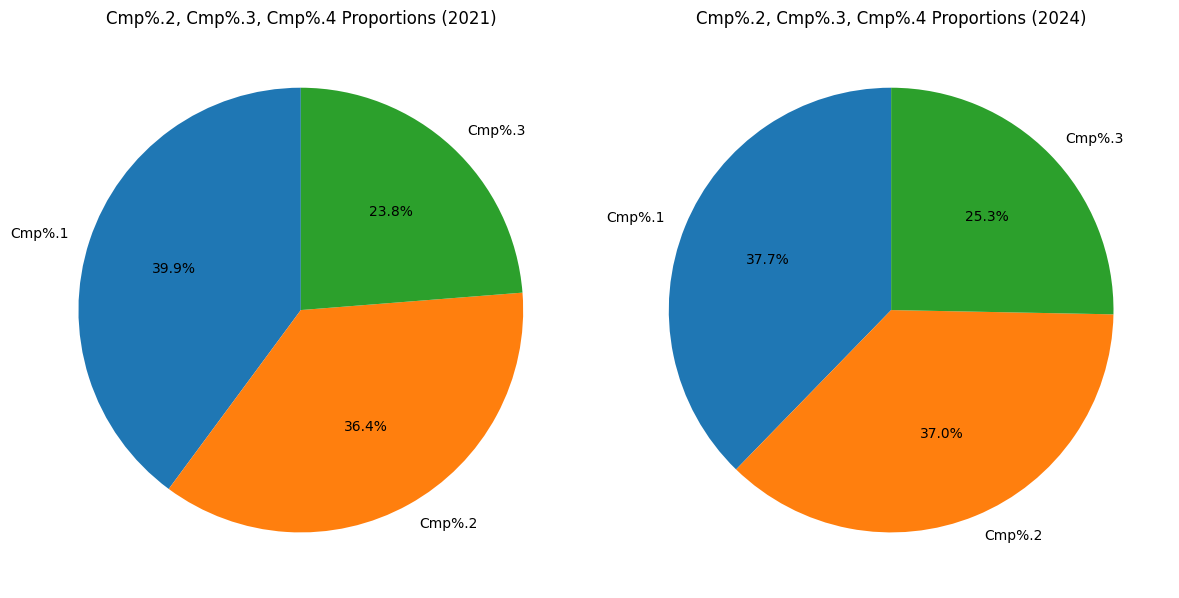

In [452]:
# Define metrics for pie charts
pie_metrics = ["Cmp%.1", "Cmp%.2", "Cmp%.3"]

# Dictionary to store aggregated values
yearly_totals = {compared_year: {metric: 0 for metric in pie_metrics}, 
                 interesting_year: {metric: 0 for metric in pie_metrics}}

# Process only the "passing" sheet
for df_name, df in filtered_data.items():
    if "passing" not in df_name.lower():  # Ensure we only process "passing" sheet
        continue  

    year = compared_year if str(compared_year) in df_name else interesting_year  # Extract year

    # Sum values for each metric
    for metric in pie_metrics:
        if metric in df.columns:
            yearly_totals[year][metric] += df[metric].sum()

# Convert dictionary to DataFrame
pie_data = pd.DataFrame(yearly_totals)

# Define color scheme
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Create subplots for 2018 and 2024
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for 2018
axes[0].pie(
    pie_data[compared_year], labels=pie_metrics, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[0].set_title(f"Cmp%.2, Cmp%.3, Cmp%.4 Proportions ({compared_year})")

# Plot pie chart for 2024
axes[1].pie(
    pie_data[interesting_year], labels=pie_metrics, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[1].set_title(f"Cmp%.2, Cmp%.3, Cmp%.4 Proportions ({interesting_year})")

# Display charts
plt.tight_layout()
plt.show()



🚨 Outliers Detected:
📌 Sheet: score_2021 | Player: Unknown | Metric: Attendance | Outlier Value: 42575.0
📌 Sheet: passing_2021 | Player: Carlos Coronel | Metric: Cmp% | Outlier Value: 54.9
📌 Sheet: passing_2021 | Player: Patryk Klimala | Metric: Cmp% | Outlier Value: 55.6
📌 Sheet: playing_time_2021 | Player: Andrew Gutman | Metric: Mn/Sub | Outlier Value: 54.0
📌 Sheet: playing_time_2021 | Player: Brian White | Metric: xG+/-90 | Outlier Value: -1.2
📌 Sheet: playing_time_2021 | Player: Florian Valot | Metric: xG+/-90 | Outlier Value: -2.56
📌 Sheet: playing_time_2021 | Player: Cameron Harper | Metric: xG+/-90 | Outlier Value: -0.48
📌 Sheet: score_2024 | Player: Unknown | Metric: Poss | Outlier Value: 70
📌 Sheet: score_2024 | Player: Unknown | Metric: Attendance | Outlier Value: 43428
📌 Sheet: playing_time_2024 | Player: Lewis Morgan | Metric: Mn/Sub | Outlier Value: 43.0
📌 Sheet: playing_time_2024 | Player: Felipe Carballo | Metric: xG+/-90 | Outlier Value: -0.88
📌 Sheet: playing_time_20

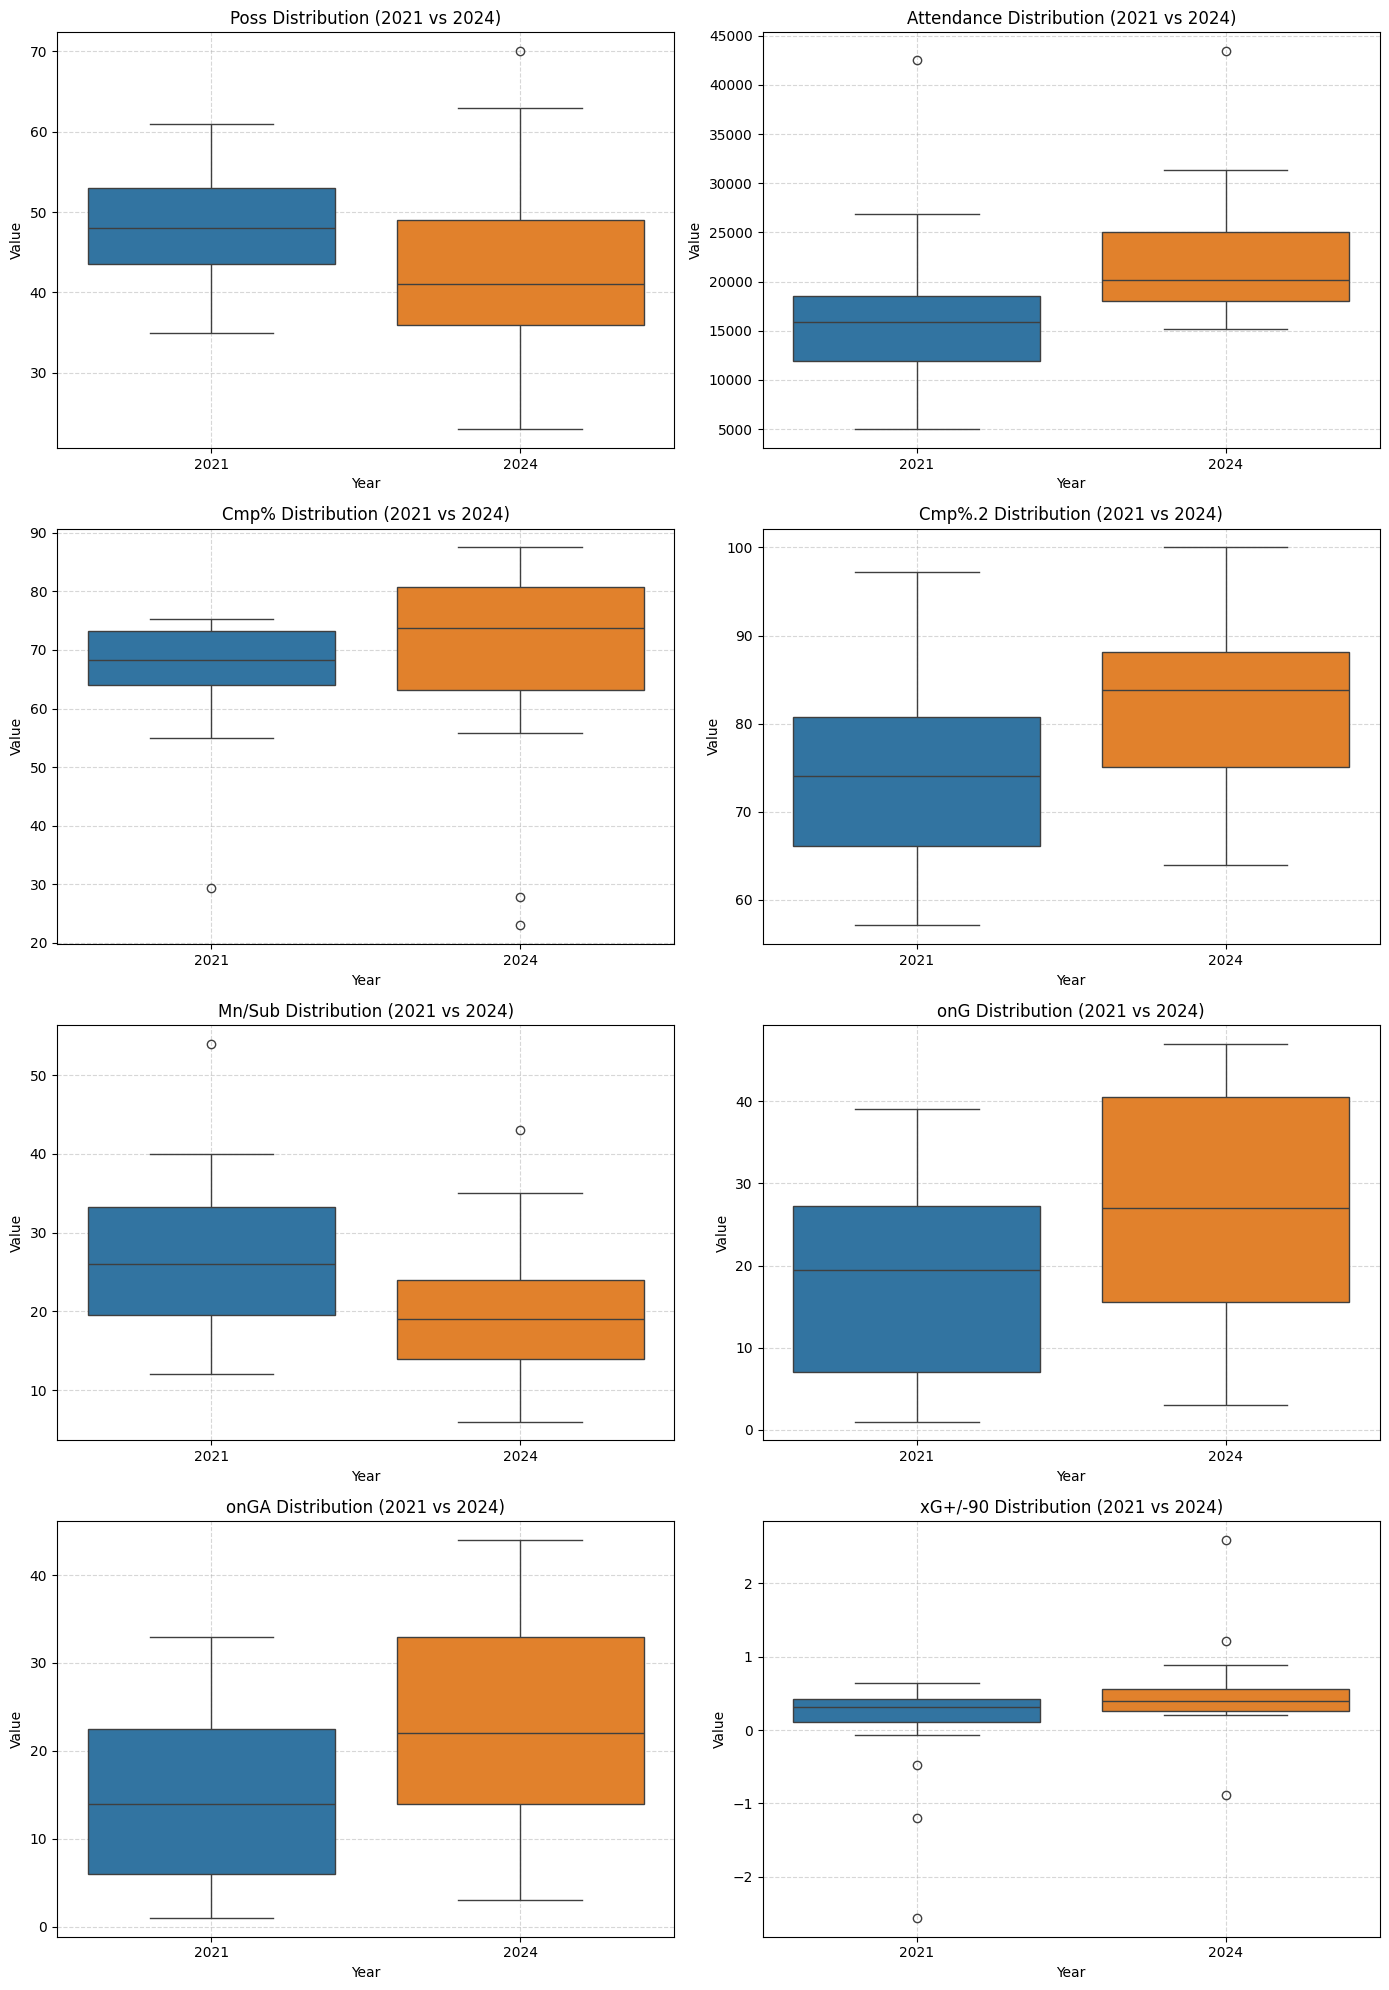

In [453]:
# Load filtered data
boxplot_data = []
outlier_instances = []

# Process each dataset
for df_name, df in filtered_data.items():
    year = compared_year if str(compared_year) in df_name else interesting_year  # Extract year

    # Filter only relevant metrics
    for metric in significant_all_metric:
        if metric in df.columns:
            metric_values = df[metric].dropna()

            # Compute Q1, Q3, and IQR for outlier detection
            Q1 = metric_values.quantile(0.25)
            Q3 = metric_values.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

            # Store all data for boxplot
            for index, value in metric_values.items():
                player = df.loc[index, "Player"] if "Player" in df.columns else "Unknown"
                boxplot_data.append({"Metric": metric, "Player": player, "Year": year, "Value": value})

                # Detect outliers
                if value < lower_bound or value > upper_bound:
                    outlier_instances.append({"Sheet": df_name, "Player": player, "Metric": metric, "Outlier Value": value})

# Print outliers
if outlier_instances:
    print("\n🚨 Outliers Detected:")
    for outlier in outlier_instances:
        print(f"📌 Sheet: {outlier['Sheet']} | Player: {outlier['Player']} | "
              f"Metric: {outlier['Metric']} | Outlier Value: {outlier['Outlier Value']}")
else:
    print("\n✅ No outliers detected.")

# Convert to DataFrame for visualization
boxplot_df = pd.DataFrame(boxplot_data)

# Dynamically determine subplot grid size
num_metrics = len(significant_all_metric)
num_cols = 2  # Fixed columns for better readability
num_rows = int(np.ceil(num_metrics / num_cols))

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))
axes = axes.flatten()  # Convert to 1D array for easier iteration

custom_palette = {compared_year: "#1f77b4", interesting_year: "#ff7f0e"}  # Blue & Orange

# Create a boxplot for each metric
for i, metric in enumerate(significant_all_metric):
    if metric in boxplot_df["Metric"].unique():
        sns.boxplot(
            x="Year", y="Value", hue="Year", data=boxplot_df[boxplot_df["Metric"] == metric],
            ax=axes[i], palette=custom_palette, legend=False  # Fix for Seaborn 0.14+ 
        )
        axes[i].set_title(f"{metric} Distribution ({compared_year} vs {interesting_year})")
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Value")
        axes[i].grid(True, linestyle="--", alpha=0.5)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Part 3: Statistical analysis between each players' roles for 2018 and 2024 metrics.

In [454]:
# Dictionary mapping player roles to their respective position codes
role_mappings = {
    "Attacker": ["FW", "AM", "LW", "RW"],
    "Midfielder": ["MF", "DM", "CM", "LM", "RM", "WM"],
    "Defender": ["DF", "FB", "LB", "RB", "CB"],
}


In [455]:
# Remove "score" data before processing
merged_df = filter_and_merge_data(filtered_data, exclude_score=True)

if merged_df is not None:
    perform_statistical_analysis(
        merged_df[merged_df["Year"] == compared_year], 
        merged_df[merged_df["Year"] == interesting_year], 
        "RBNY_yearly_stats/significance/yearly_significant_diff.csv"
    )

# Main execution for role-based comparison using merged data
for role, positions in role_mappings.items():
    # Filter merged data for the current role
    role_df = merged_df[merged_df["Pos"].apply(lambda x: any(pos in str(x).split(",") for pos in positions))]

    if role_df.empty:
        print(f"⚠️ No data found for {role}, skipping.")
        continue

    perform_statistical_analysis(
        role_df[role_df["Year"] == compared_year], 
        role_df[role_df["Year"] == interesting_year], 
        f"RBNY_yearly_stats/significance/{role.lower()}_significant_diff.csv"
    )

⏩ Skipping sheet: score_2021
⏩ Skipping sheet: goalkeeping_2021
⏩ Skipping sheet: advanced_goalkeeping_2021
⏩ Skipping sheet: score_2024
⏩ Skipping sheet: goalkeeping_2024
⏩ Skipping sheet: advanced_goalkeeping_2024

✅ 6 significant differences found. Results saved to RBNY_yearly_stats/significance/yearly_significant_diff.csv.

⚠️ Assumption violations detected:
 - MP: Normality violated? True, Variance violated? False
 - 90s: Normality violated? True, Variance violated? True
 - Gls: Normality violated? True, Variance violated? False
 - Ast: Normality violated? True, Variance violated? False
 - G+A: Normality violated? True, Variance violated? False
 - G-PK: Normality violated? True, Variance violated? False
 - PK: Normality violated? True, Variance violated? False
 - PKatt: Normality violated? True, Variance violated? False
 - CrdY: Normality violated? True, Variance violated? False
 - CrdR: Normality violated? True, Variance violated? False
 - xG: Normality violated? True, Variance v

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3361: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3361: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom



✅ 4 significant differences found. Results saved to RBNY_yearly_stats/significance/attacker_significant_diff.csv.

⚠️ Assumption violations detected:
 - 90s: Normality violated? True, Variance violated? False
 - Gls: Normality violated? True, Variance violated? False
 - Ast: Normality violated? True, Variance violated? False
 - G+A: Normality violated? True, Variance violated? False
 - G-PK: Normality violated? True, Variance violated? False
 - PK: Normality violated? True, Variance violated? False
 - PKatt: Normality violated? True, Variance violated? False
 - CrdY: Normality violated? True, Variance violated? False
 - xG: Normality violated? True, Variance violated? False
 - npxG: Normality violated? True, Variance violated? False
 - G+A.1: Normality violated? True, Variance violated? False
 - G-PK.1: Normality violated? True, Variance violated? False
 - G+A-PK: Normality violated? True, Variance violated? False
 - Sh: Normality violated? True, Variance violated? False
 - SoT%: Norm

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3361: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [456]:
# 1️⃣ Load significant metrics from CSV files for each role
roles_path = {
    "attacker": "RBNY_yearly_stats/significance/attacker_significant_diff.csv",
    "defender": "RBNY_yearly_stats/significance/defender_significant_diff.csv",
    "midfielder": "RBNY_yearly_stats/significance/midfielder_significant_diff.csv"
}

def retrieve_metrics(path):
    """Load significant metrics from a CSV file and return a list of metrics."""
    df_significant = pd.read_csv(path)
    return df_significant['Metric'].dropna().tolist()

# Store significant metrics for each role
significant_metrics = {role: retrieve_metrics(path) for role, path in roles_path.items()}

# Flatten unique metrics across all roles
all_significant_metrics = set(metric for metrics in significant_metrics.values() for metric in metrics)


Columns in boxplot_df: ['Pos', 'Year', 'Metric', 'Value']
Sample rows:
      Pos  Year Metric  Value
0     GK  2021   Cmp%    NaN
1     MF  2021   Cmp%    NaN
2     DF  2021   Cmp%    NaN
3  DF,MF  2021   Cmp%    NaN
4     FW  2021   Cmp%    NaN


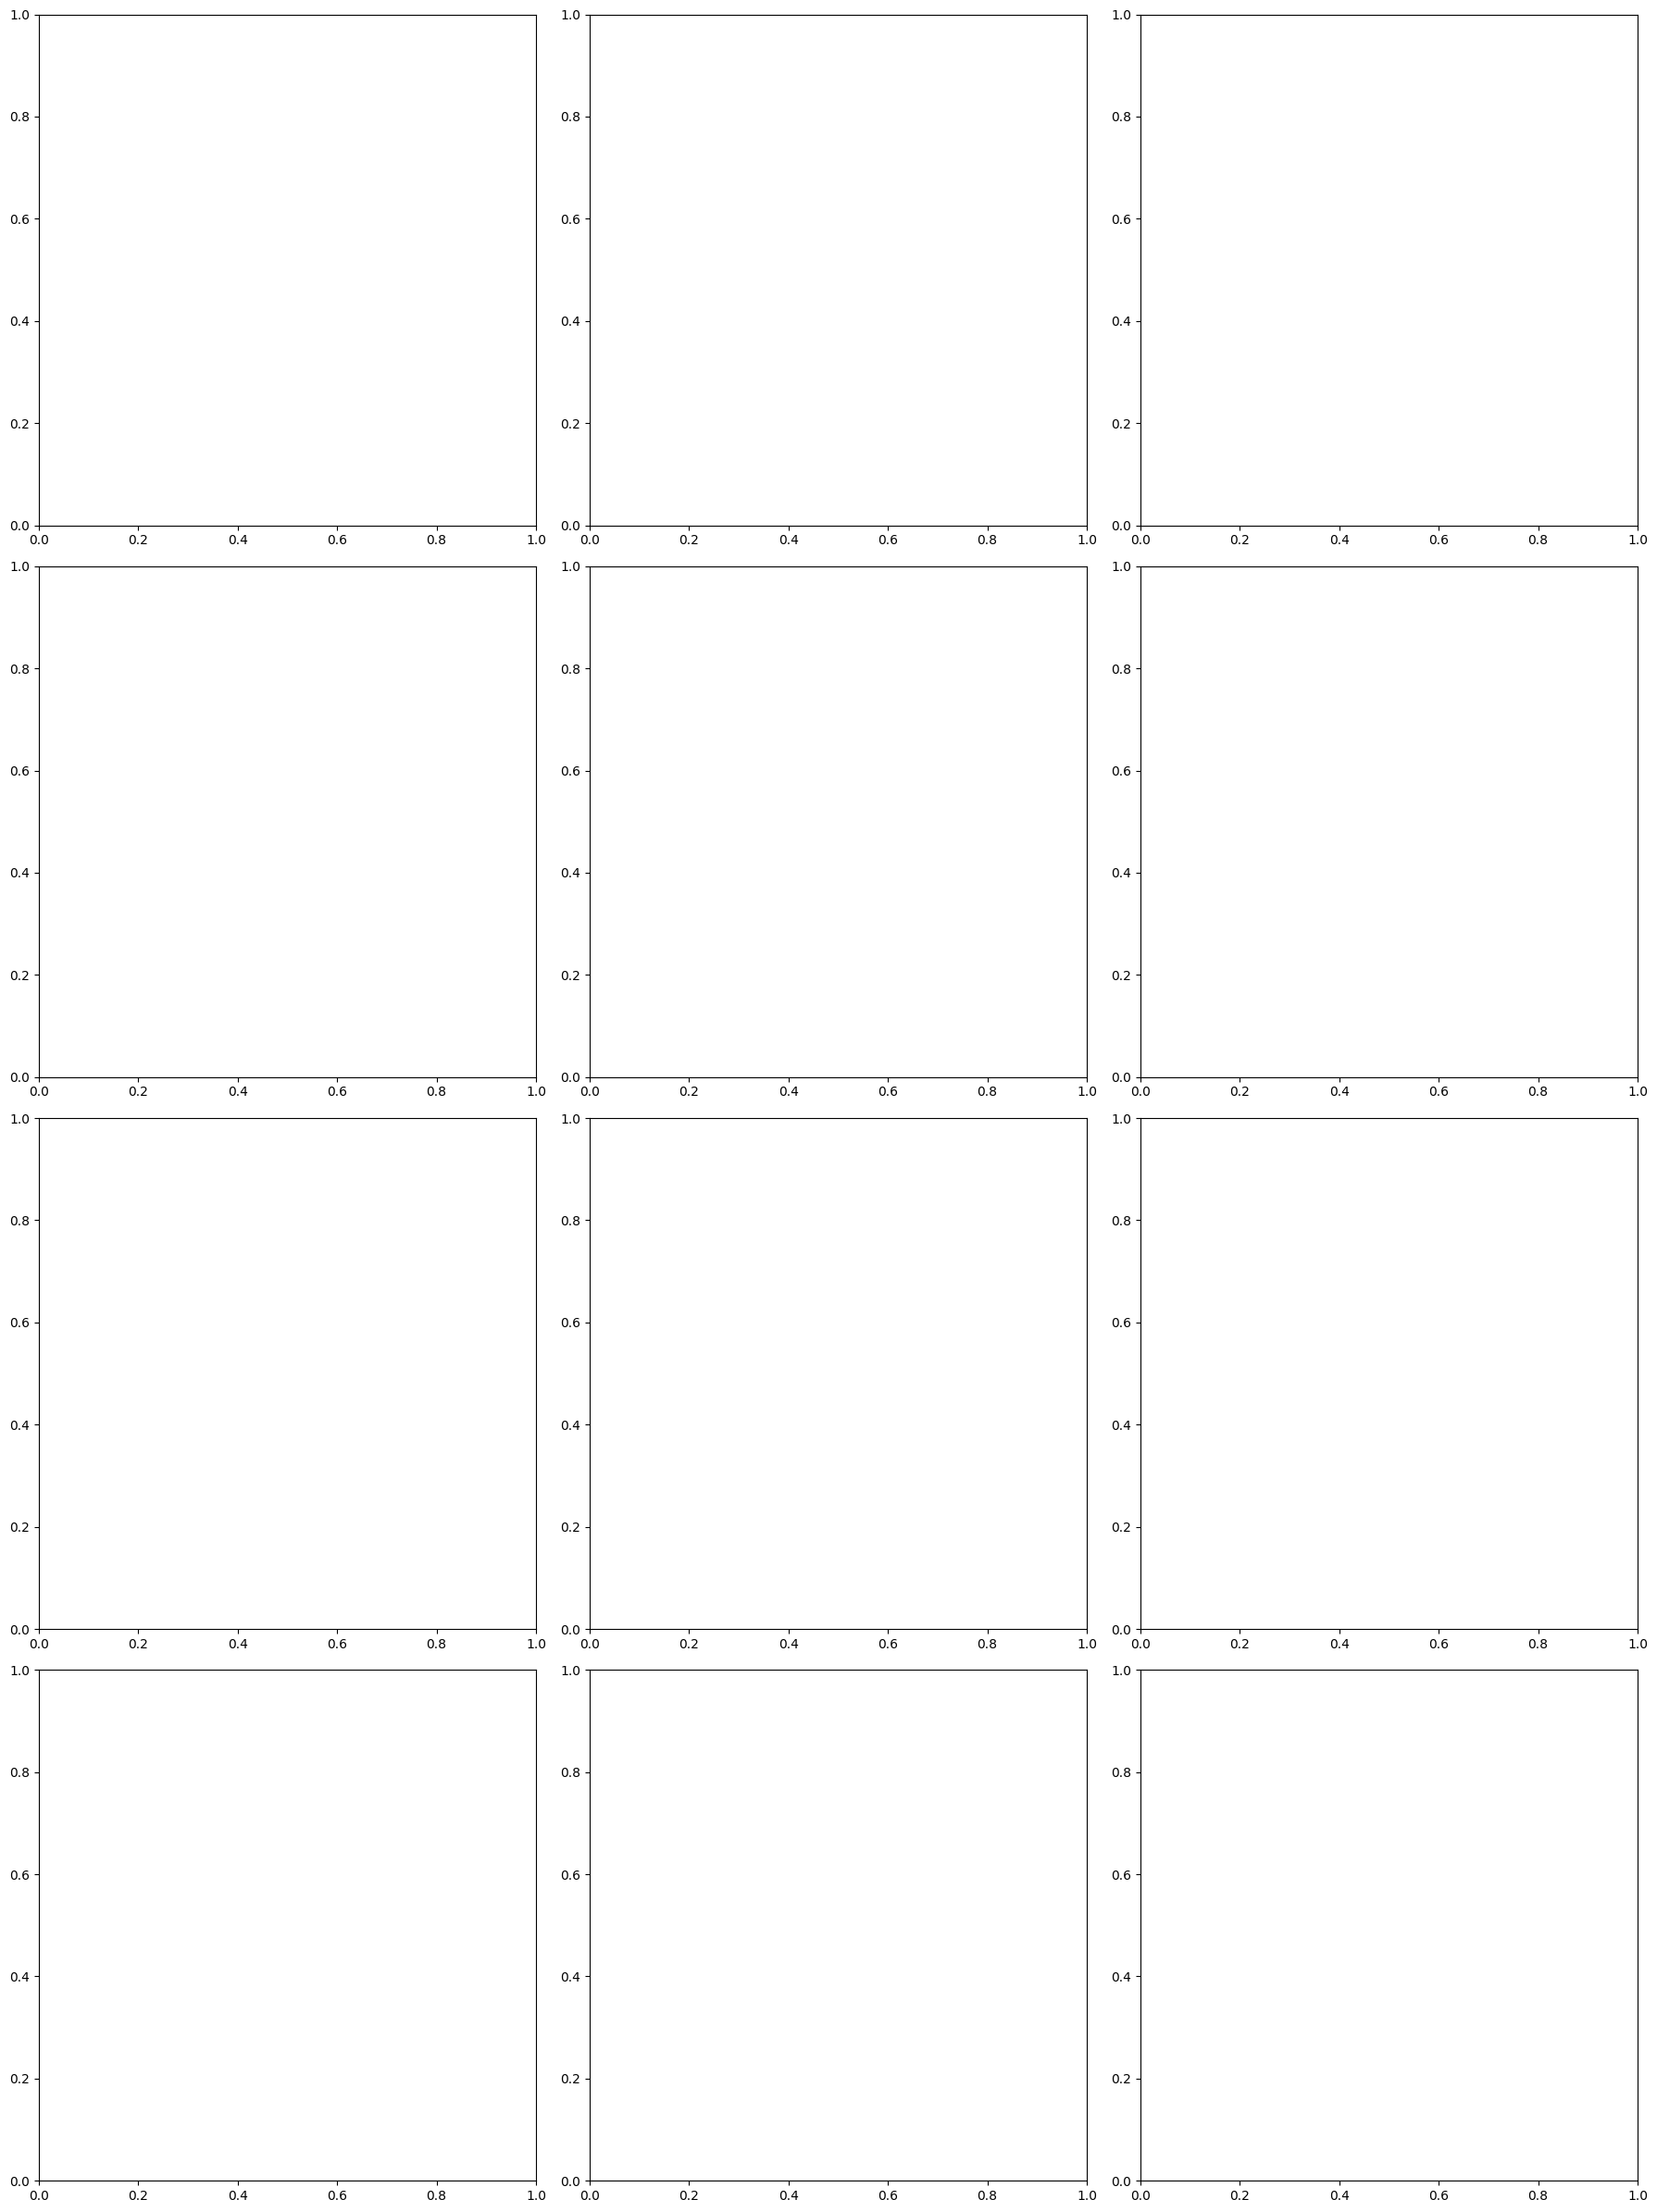

In [457]:
# 2️⃣ Reshape merged_df to long format
boxplot_df = merged_df.melt(id_vars=["Pos", "Year"], value_vars=all_significant_metrics, 
                             var_name="Metric", value_name="Value")

# Debugging: Check if columns are correct
print("Columns in boxplot_df:", boxplot_df.columns.tolist())
print("Sample rows:\n", boxplot_df.head())


# 3️⃣ Define color palette
custom_palette = {2021: "#1f77b4", 2024: "#ff7f0e"}  # Blue for 2021, Orange for 2024

num_cols = 3  # Number of plots per row
num_rows = -(-len(all_significant_metrics) // num_cols)  # Round up

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten()

# 4️⃣ Create boxplots for each metric
for i, metric in enumerate(all_significant_metrics):
    # Identify which roles this metric was significant for
    relevant_roles = [role for role, metrics in significant_metrics.items() if metric in metrics]

    # Filter data only for those roles
    metric_df = boxplot_df[(boxplot_df["Metric"] == metric) & (boxplot_df["Pos"].isin(relevant_roles))]
    
    if not metric_df.empty:
        sns.boxplot(
            x="Pos", y="Value", hue="Year", data=metric_df, palette=custom_palette, ax=axes[i]
        )
        axes[i].set_title(f"{metric} Distribution by Position (2021 vs 2024)")
        axes[i].set_xlabel("Position")
        axes[i].set_ylabel("Value")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title="Year")
        axes[i].grid(True, linestyle="--", alpha=0.5)

# 5️⃣ Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


need to fix the logic and combine the significance metrics to the graphs

Analysis: 
- Calculate the average and standard deviation for all metrics from both 2018 and 2024 files. This data will be segmented for each player roles as each roles are expected to contribute differently to the game. As such, certain roles have specific metrics at which they need to perform.

Segment and average all metrics from 2018 and 2024 files based on player roles (attackers, midfielder, defenders, goalkeeper)


Visualize the significant metrics averages based on their roles

- attacker: Cmp%.2
- defender: Carries, TotDist, Rec
- midfielder: Cmp%, Cmp%.2, Cmp%.3 
- goalkeeper: none

Columns in boxplot_df: ['Pos', 'Year', 'Metric', 'Value']
First few rows:
      Pos  Year Metric  Value
0     GK  2021   Cmp%    NaN
1     MF  2021   Cmp%    NaN
2     DF  2021   Cmp%    NaN
3  DF,MF  2021   Cmp%    NaN
4     FW  2021   Cmp%    NaN


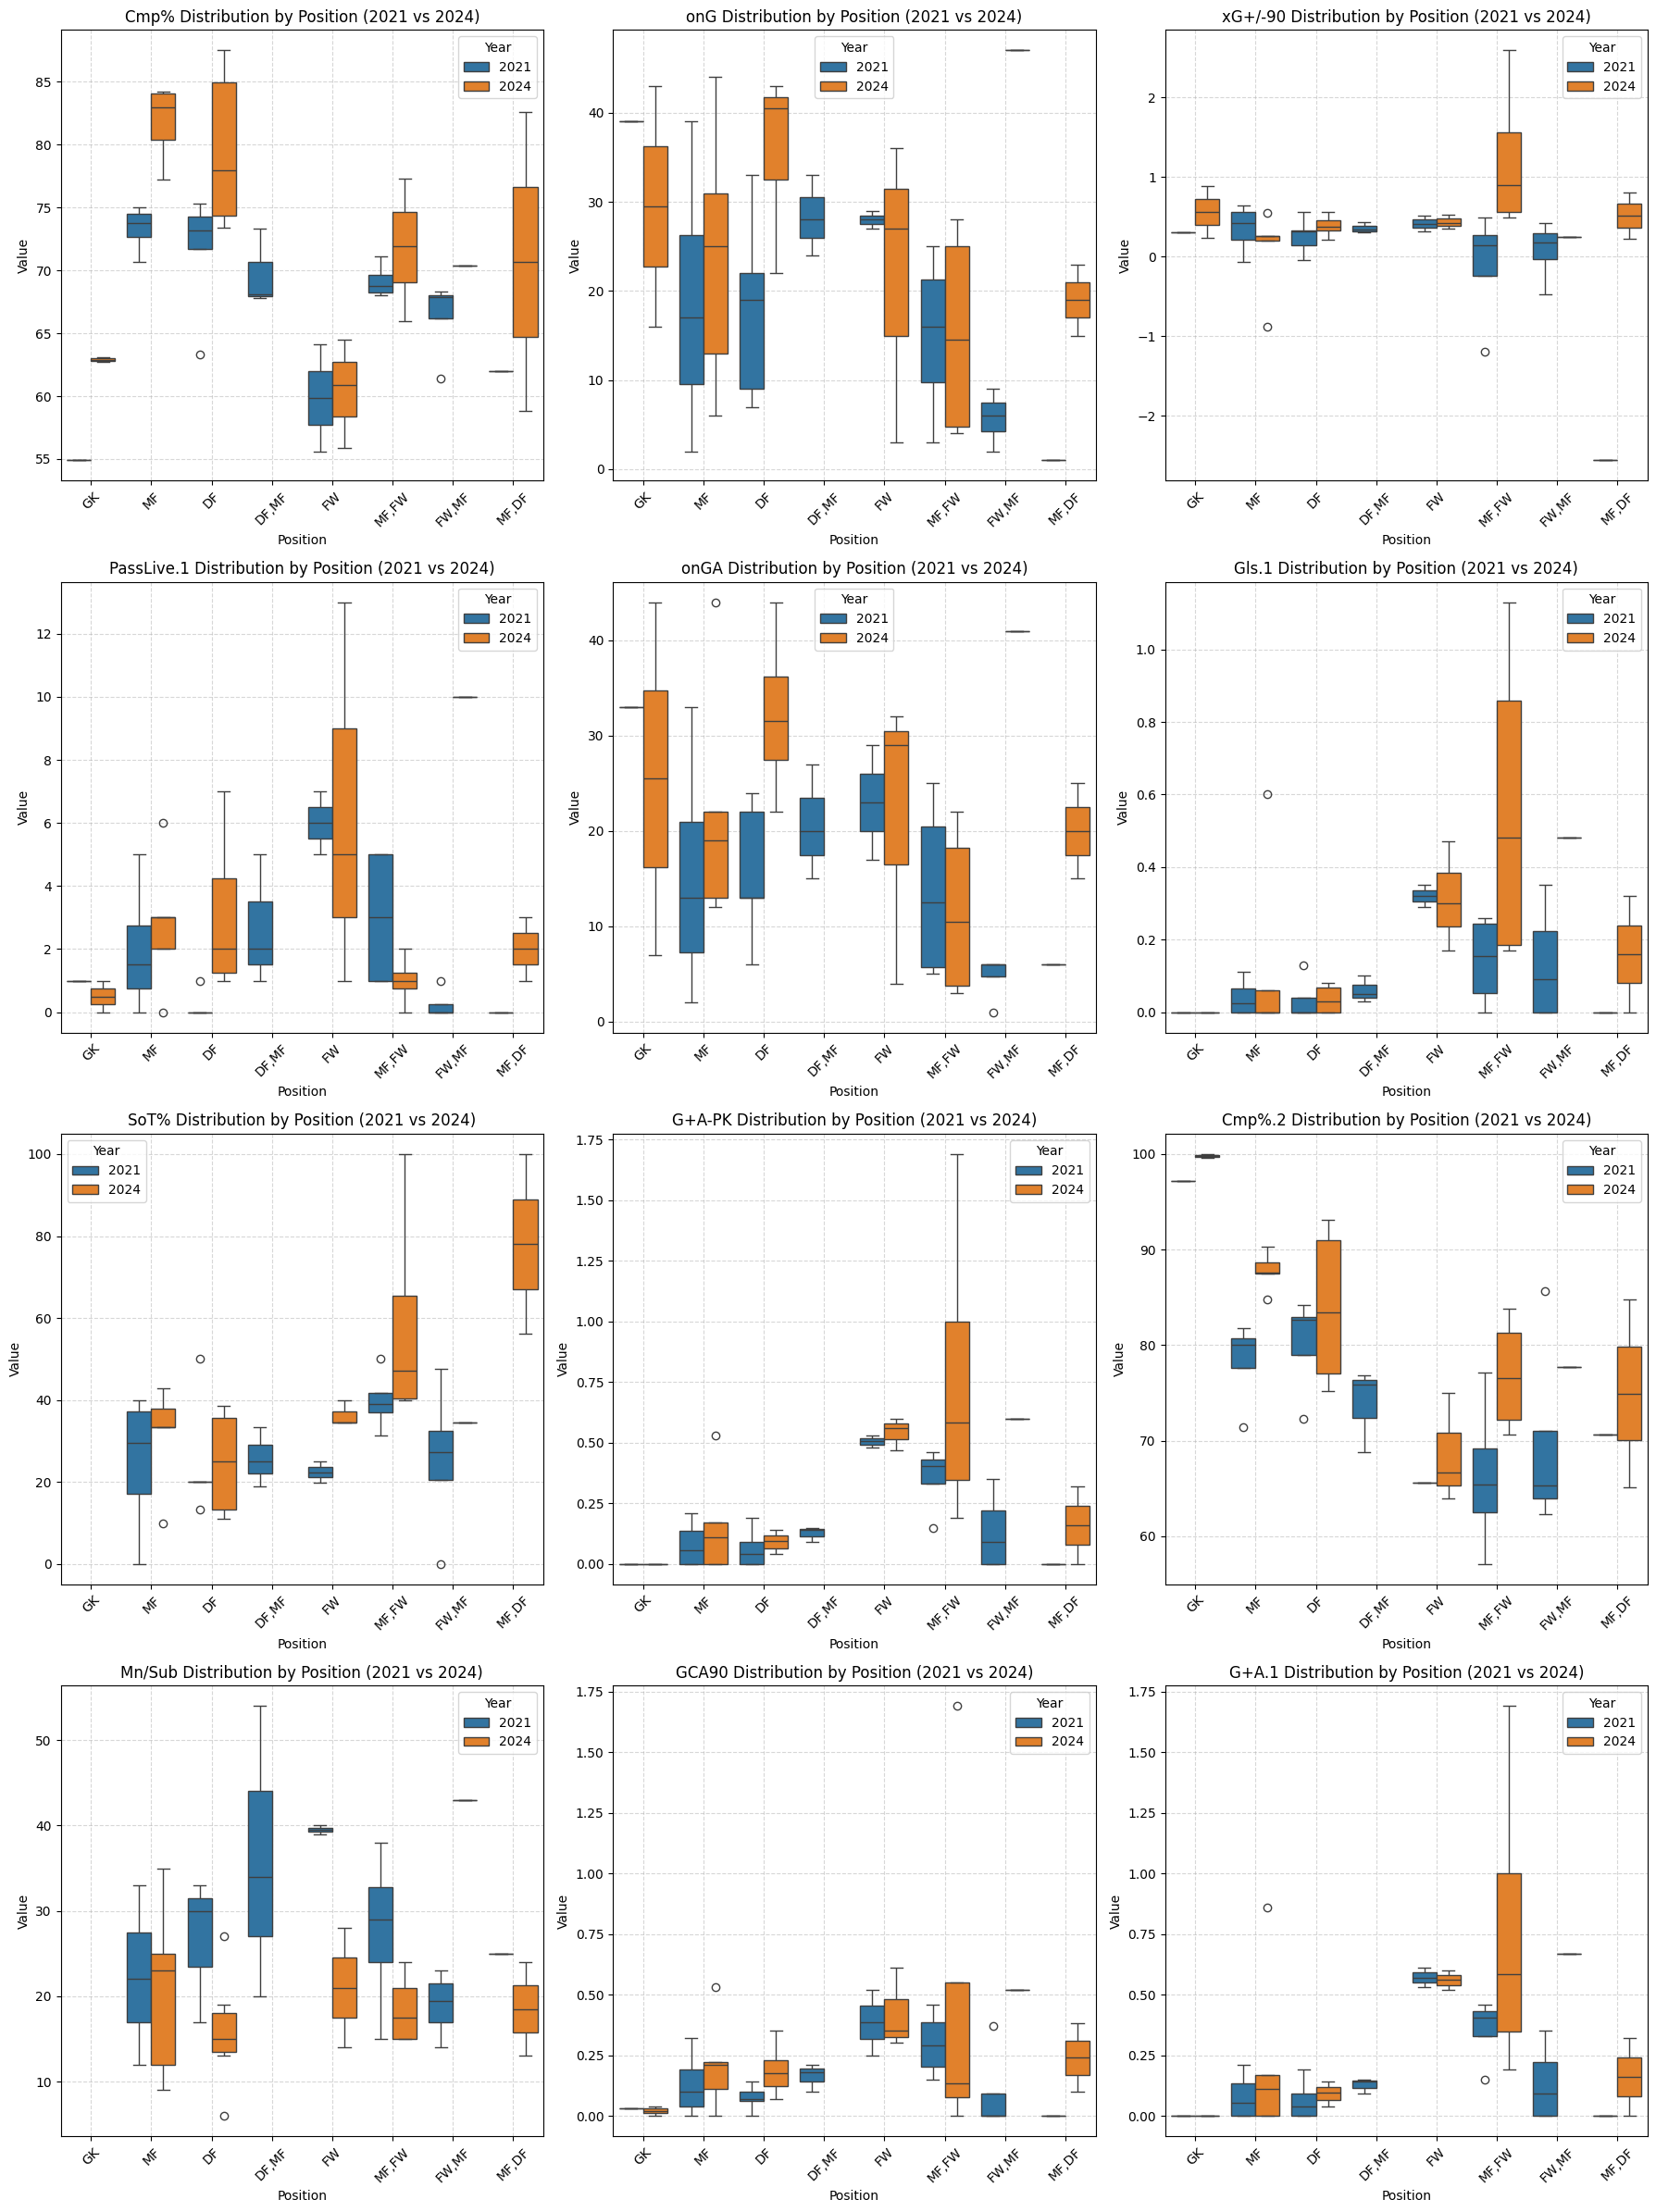

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load significant metrics
roles_path = {
    "attacker": "RBNY_yearly_stats/significance/attacker_significant_diff.csv",
    "defender": "RBNY_yearly_stats/significance/defender_significant_diff.csv",
    "midfielder": "RBNY_yearly_stats/significance/midfielder_significant_diff.csv"
}

def retrieve_metrics(path):
    """Load significant metrics from a CSV file and return a list of metrics."""
    df_significant = pd.read_csv(path)
    return df_significant['Metric'].dropna().tolist()

# Dictionary to store significant metrics for each role
significant_metrics = {role: retrieve_metrics(path) for role, path in roles_path.items()}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Debugging: Check DataFrame structure
print("Columns in boxplot_df:", boxplot_df.columns.tolist())
print("First few rows:\n", boxplot_df.head())

# Ensure required columns exist
required_columns = {"Metric", "Pos", "Value", "Year"}  # Updated "Role" → "Pos"
missing_columns = required_columns - set(boxplot_df.columns)

if missing_columns:
    raise ValueError(f"Missing columns in boxplot_df: {missing_columns}")

# Custom color palette
custom_palette = {compared_year: "#1f77b4", interesting_year: "#ff7f0e"}

# Unique significant metrics
unique_metrics = set(metric for metrics in significant_metrics.values() for metric in metrics)

num_cols = 3  # Number of graphs per row
num_rows = -(-len(unique_metrics) // num_cols)  # Round up to get required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten()  # Flatten in case of multiple rows

# Create boxplots
for i, metric in enumerate(unique_metrics):
    metric_df = boxplot_df[boxplot_df["Metric"] == metric]
    
    if not metric_df.empty:
        sns.boxplot(
            x="Pos", y="Value", hue="Year", data=metric_df, palette=custom_palette, ax=axes[i]
        )
        axes[i].set_title(f"{metric} Distribution by Position ({compared_year} vs {interesting_year})")
        axes[i].set_xlabel("Position")  # Updated "Role" → "Position"
        axes[i].set_ylabel("Value")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title="Year")
        axes[i].grid(True, linestyle="--", alpha=0.5)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [459]:
attacker_summary = pd.read_csv('RBNY_yearly_stats/summary_stats/attacker_stats_summary.csv')
print(attacker_summary)

     Metric        Mean         Std                Sheet  Year
0       Age   23.071429    3.852358  standard_stats_2018  2018
1        MP   13.357143   12.701345  standard_stats_2018  2018
2    Starts    8.000000    9.429903  standard_stats_2018  2018
3       Min  803.461538  843.352300  standard_stats_2018  2018
4       90s    8.915385    9.376020  standard_stats_2018  2018
..      ...         ...         ...                  ...   ...
159     1/3   13.333333   13.257074      possession_2024  2024
160     CPA    9.888889    9.980537      possession_2024  2024
161     Mis   29.666667   27.221315      possession_2024  2024
162     Dis   12.333333   11.586630      possession_2024  2024
163     Rec  278.111111  253.108892      possession_2024  2024

[164 rows x 5 columns]


In [460]:
filtered_data

{'standard_stats_2021':                    Player   Nation    Pos  Age  MP  Starts     Min   90s  Gls  \
 0          Carlos Coronel   py PAR     GK   24  34      34  3060.0  34.0  0.0   
 1              Sean Davis   us USA     MF   27  34      34  3060.0  34.0  0.0   
 2             Sean Nealis   us USA     DF   24  28      28  2430.0  27.0  1.0   
 3             Kyle Duncan   us USA  DF,MF   23  32      27  2600.0  28.9  1.0   
 4          Patryk Klimala   pl POL     FW   22  29      26  2079.0  23.1  8.0   
 5                   Fábio   br BRA     FW   23  30      25  2188.0  24.3  7.0   
 6             Tom Edwards  eng ENG     DF   22  27      25  1950.0  21.7  0.0   
 7   Cristian Cásseres Jr.   ve VEN  MF,FW   21  27      24  2060.0  22.9  6.0   
 8             John Tolkin   us USA  DF,MF   18  28      22  1989.0  22.1  1.0   
 9           Andrew Gutman   us USA  DF,MF   24  22      19  1835.0  20.4  2.0   
 10           Dru Yearwood  eng ENG     MF   20  29      18  1689.0  18.8  

In [461]:
print(filtered_data["passing_2024"])


              Player    Pos   90s   Cmp   Att  Cmp%  TotDist  PrgDist  Cmp.1  \
0     Daniel Edelman     MF  28.0  1274  1514  84.1    22637     6768    546   
1     Carlos Coronel     GK  27.0   562   891  63.1    16631    12382     99   
2          Noah Eile     DF  26.9  1456  1685  86.4    30646    11334    441   
3        John Tolkin     DF  26.5  1074  1463  73.4    20386     7402    474   
4      Dante Vanzeir     FW  23.1   271   445  60.9     4003     1023    163   
5       Lewis Morgan  FW,MF  26.8   517   734  70.4     8493     2321    248   
6       Dylan Nealis     DF  25.9  1053  1399  75.3    19277     6492    444   
7        Sean Nealis     DF  24.8  1140  1303  87.5    21591     7487    401   
8      Frankie Amaya     MF  17.9   684   851  80.4    12435     3880    307   
9   Wikelman Carmona  MF,FW  17.7   466   603  77.3     7682     2218    248   
10      Andrés Reyes     DF  16.6   585   725  80.7    11613     4264    181   
11      Elias Manoel     FW  17.2   193 

Do correlation between all metrics and ppg to determine which metric predicts the team performance

Maybe look at specific players and their performance based on avgs.
